# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [17]:
df.sample(20)

,anio,clave_ent,entidad,tipo_de_delito,nombre_mes,fecha,frecuencia
137119,2023,30,Veracruz de Ignacio de la Llave,Otros delitos contra la sociedad,marzo,2023-03-01,1.0
120794,2022,28,Tamaulipas,Otros delitos contra la sociedad,diciembre,2022-12-01,0.0
59456,2018,28,Tamaulipas,Trata de personas,mayo,2018-05-01,0.0
153163,2024,32,Zacatecas,Acoso sexual,marzo,2024-03-01,8.0
53667,2018,16,Michoacán de Ocampo,Robo,enero,2018-01-01,1473.0
30937,2017,1,Aguascalientes,Homicidio,agosto,2017-08-01,28.0
14250,2015,30,Veracruz de Ignacio de la Llave,Otros delitos del Fuero Común,junio,2015-06-01,252.0
86897,2020,22,Querétaro,Abuso de confianza,julio,2020-07-01,54.0
41773,2017,24,San Luis Potosí,Abuso de confianza,agosto,2017-08-01,34.0
120745,2022,28,Tamaulipas,Lesiones,agosto,2022-08-01,296.0


In [18]:
df_1 = df[df['tipo_de_delito'] == 'Homicidio']

In [19]:
df_1.head()

,anio,clave_ent,entidad,tipo_de_delito,nombre_mes,fecha,frecuencia
216,2015,1,Aguascalientes,Homicidio,abril,2015-04-01,21.0
217,2015,1,Aguascalientes,Homicidio,agosto,2015-08-01,14.0
218,2015,1,Aguascalientes,Homicidio,diciembre,2015-12-01,18.0
219,2015,1,Aguascalientes,Homicidio,enero,2015-01-01,22.0
220,2015,1,Aguascalientes,Homicidio,febrero,2015-02-01,20.0


In [20]:
estados = ["Ciudad de México", "Jalisco", "Guanajuato"]

In [22]:
df_1.dtypes

,0
anio,int64
clave_ent,int64
entidad,object
tipo_de_delito,object
nombre_mes,object
fecha,datetime64[ns]
frecuencia,float64


In [25]:
df_filtrado = df_1[
    (df["entidad"].isin(estados)) &
    (df["fecha"] >= "2015-01-01") &
    (df["fecha"] <= "2019-07-31")
]

/tmp/ipython-input-808950239.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_1[


In [30]:
df_filtrado.head()

,anio,clave_ent,entidad,tipo_de_delito,nombre_mes,fecha,frecuencia
4056,2015,9,Ciudad de México,Homicidio,abril,2015-04-01,130.0
4057,2015,9,Ciudad de México,Homicidio,agosto,2015-08-01,133.0
4058,2015,9,Ciudad de México,Homicidio,diciembre,2015-12-01,130.0
4059,2015,9,Ciudad de México,Homicidio,enero,2015-01-01,101.0
4060,2015,9,Ciudad de México,Homicidio,febrero,2015-02-01,148.0


In [32]:
df_filtrado = df_filtrado.sort_values("fecha")

In [35]:
df_serie = (
    df_filtrado
    .groupby(["fecha", "entidad"], as_index=False)["frecuencia"]
    .sum()
)

In [36]:
df_serie = df_serie.sort_values("fecha")

In [37]:
import plotly.express as px

fig = px.line(
    df_serie,
    x="fecha",
    y="frecuencia",
    color="entidad",
    title="Frecuencia absoluta de homicidios (Ene 2015 – Jul 2019)",
    labels={
        "fecha": "Fecha",
        "frecuencia": "Número de homicidios",
        "entidad": "Estado"
    }
)

fig.show()

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [38]:
df_ej2 = df

In [39]:
df_ej2.sample(10)

,anio,clave_ent,entidad,tipo_de_delito,nombre_mes,fecha,frecuencia
46481,2018,1,Aguascalientes,Secuestro,julio,2018-07-01,0.0
97910,2021,12,Guerrero,Violencia familiar,diciembre,2021-12-01,226.0
37664,2017,15,México,Homicidio,mayo,2017-05-01,282.0
25556,2016,22,Querétaro,Delitos cometidos por servidores públicos,mayo,2016-05-01,0.0
107095,2021,32,Zacatecas,Allanamiento de morada,marzo,2021-03-01,23.0
7839,2015,17,Morelos,Extorsión,enero,2015-01-01,15.0
88180,2020,24,San Luis Potosí,Otros delitos que atentan contra la libertad p...,febrero,2020-02-01,52.0
124453,2023,4,Campeche,Electorales,agosto,2023-08-01,0.0
80318,2020,8,Chihuahua,Extorsión,diciembre,2020-12-01,1.0
132482,2023,21,Puebla,Aborto,diciembre,2023-12-01,0.0


In [40]:
df_ej2[
    (df_ej2["entidad"] == "Colima") &
    (df_ej2["anio"] == 2018) &
    (df_ej2["tipo_de_delito"] == "Homicidio")
]["frecuencia"].sum()

np.float64(726.0)

In [41]:
df_ej2["tipo_de_delito"].unique()

array(['Aborto', 'Abuso de confianza', 'Abuso sexual', 'Acoso sexual',
       'Allanamiento de morada', 'Amenazas', 'Contra el medio ambiente',
       'Corrupción de menores', 'Daño a la propiedad',
       'Delitos cometidos por servidores públicos', 'Despojo',
       'Electorales', 'Evasión de presos', 'Extorsión', 'Falsedad',
       'Falsificación', 'Feminicidio', 'Fraude', 'Homicidio',
       'Hostigamiento sexual', 'Incesto',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Lesiones', 'Narcomenudeo', 'Otros delitos contra el patrimonio',
       'Otros delitos contra la familia',
       'Otros delitos contra la sociedad',
       'Otros delitos del Fuero Común',
       'Otros delitos que atentan contra la libertad personal',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Rapto', 'Robo', 'Secuestro', 'Trata de personas',
       'Tráfico de menores', 

In [42]:
df_ej2[
    (df_ej2["anio"] == 2019) &
    (df_ej2["tipo_de_delito"] == "Robo")
]["frecuencia"].sum()

np.float64(766096.0)

In [43]:
df_hom_fem = df_ej2[
    df_ej2["tipo_de_delito"].isin(["Homicidio", "Feminicidio"])
]

suma_por_anio = (
    df_hom_fem
    .groupby("anio")["frecuencia"]
    .sum()
    .reset_index()
)

suma_por_anio

,anio,frecuencia
0,2015,31744.0
1,2016,36018.0
2,2017,42068.0
3,2018,45385.0
4,2019,45822.0
5,2020,44223.0
6,2021,44960.0
7,2022,43845.0
8,2023,42846.0
9,2024,22307.0


In [45]:
fem_mun_mes = (
    df_ej2[df_ej2["tipo_de_delito"] == "Feminicidio"]
    .groupby(["fecha", "entidad"], as_index=False)["frecuencia"]
    .sum()
)

fem_mun_mes.loc[fem_mun_mes["frecuencia"].idxmax()]

,2128
fecha,2020-07-01
entidad,México
frecuencia,19.0


In [46]:
fem_estado_anio = (
    df_ej2[df_ej2["tipo_de_delito"] == "Feminicidio"]
    .groupby(["anio", "entidad"], as_index=False)["frecuencia"]
    .sum()
)

fem_estado_anio.loc[fem_estado_anio["frecuencia"].idxmax()]

,176
anio,2020
entidad,México
frecuencia,151.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

In [48]:
df_ej3 = df.copy()

In [49]:
delitos_por_anio = (
    df_ej3
    .groupby(["anio", "tipo_de_delito"])["frecuencia"]
    .sum()
    .reset_index()
)

In [50]:
anios = sorted(delitos_por_anio["anio"].unique())

In [52]:
anios = anios[:3]   # puedes cambiar a los que quieras

In [54]:
datos_anio = datos_anio.sort_values("frecuencia", ascending=False).head(8)

In [56]:
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

/tmp/ipython-input-3052796387.py:25: UserWarning:

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations



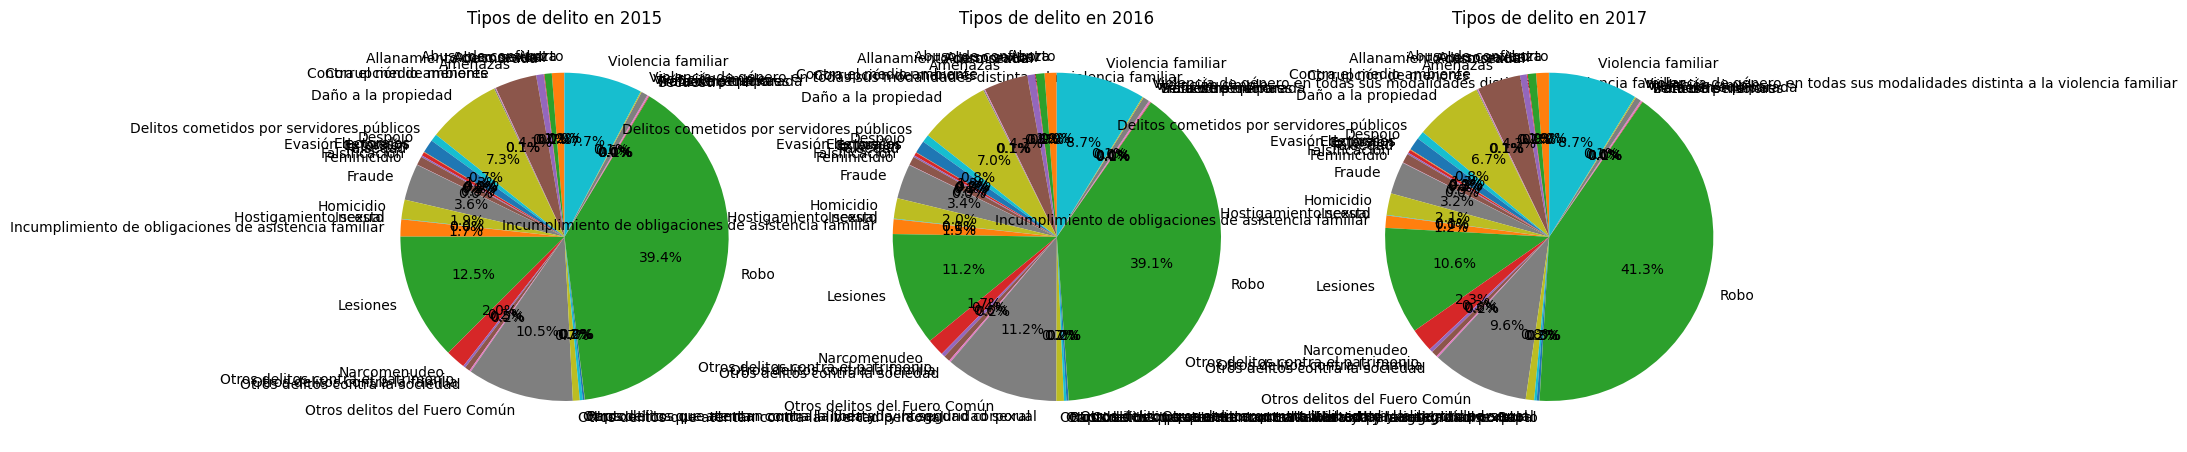

In [57]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(anios),
    figsize=(6 * len(anios), 6)
)

# Si solo hay un año, axes no es iterable
if len(anios) == 1:
    axes = [axes]

for ax, anio in zip(axes, anios):
    datos_anio = delitos_por_anio[
        delitos_por_anio["anio"] == anio
    ]

    ax.pie(
        datos_anio["frecuencia"],
        labels=datos_anio["tipo_de_delito"],
        autopct="%1.1f%%",
        startangle=90
    )

    ax.set_title(f"Tipos de delito en {anio}")

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [58]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [61]:
df_delitos = df_ej2.copy()   # <-- si tu DF se llama distinto, cámbialo aquí

In [63]:
delitos_entidad = (
    df_delitos
    .groupby(["clave_ent", "entidad"], as_index=False)["frecuencia"]
    .sum()
    .rename(columns={"frecuencia": "delitos_totales"})
)
delitos_entidad.head()


,clave_ent,entidad,delitos_totales
0,1,Aguascalientes,330860.0
1,2,Baja California,1027969.0
2,3,Baja California Sur,208528.0
3,4,Campeche,79026.0
4,5,Coahuila de Zaragoza,523033.0


In [66]:
# Asegura que ambas claves sean int
delitos_entidad["clave_ent"] = pd.to_numeric(delitos_entidad["clave_ent"], errors="coerce").astype("Int64")
pobs["clave_entidad"] = pd.to_numeric(pobs["clave_entidad"], errors="coerce").astype("Int64")

df_tasa = delitos_entidad.merge(
    pobs,
    left_on="clave_ent",
    right_on="clave_entidad",
    how="left"
)

df_tasa[["clave_ent", "entidad_x", "delitos_totales", "poblacion"]].head()

,clave_ent,entidad_x,delitos_totales,poblacion
0,1,Aguascalientes,330860.0,1312544.0
1,2,Baja California,1027969.0,3315766.0
2,3,Baja California Sur,208528.0,712029.0
3,4,Campeche,79026.0,899931.0
4,5,Coahuila de Zaragoza,523033.0,5217908.0


In [68]:
df_tasa = delitos_entidad.merge(
    pobs,
    left_on="clave_ent",
    right_on="clave_entidad",
    how="left"
)

df_tasa[["clave_ent", "entidad_x", "delitos_totales", "poblacion"]].head()

,clave_ent,entidad_x,delitos_totales,poblacion
0,1,Aguascalientes,330860.0,1312544.0
1,2,Baja California,1027969.0,3315766.0
2,3,Baja California Sur,208528.0,712029.0
3,4,Campeche,79026.0,899931.0
4,5,Coahuila de Zaragoza,523033.0,5217908.0


In [70]:
df_tasa["tasa_100k"] = (df_tasa["delitos_totales"] / df_tasa["poblacion"]) * 100_000
df_tasa["tasa_anualizada"] = df_tasa["tasa_100k"] * 12

df_tasa[["entidad_x", "delitos_totales", "poblacion", "tasa_100k", "tasa_anualizada"]].head()

,entidad_x,delitos_totales,poblacion,tasa_100k,tasa_anualizada
0,Aguascalientes,330860.0,1312544.0,25207.535900,302490.430797
1,Baja California,1027969.0,3315766.0,31002.459160,372029.509923
2,Baja California Sur,208528.0,712029.0,29286.447603,351437.371231
3,Campeche,79026.0,899931.0,8781.339903,105376.078833
4,Coahuila de Zaragoza,523033.0,5217908.0,10023.806476,120285.677708
